In [1]:
import facenet_mini as fm
import numpy as np

import numpy as np
import cv2

from tqdm.cli import tqdm
from os import walk,path as pathlib
from glob import glob

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from plotly import express as ex

%matplotlib inline

In [11]:
path = "./notebooks/images/train/"
n_faces = 200

vector_length = 64
multiplication_factor = 256

margin = 8
epochs = 300
batch_size = 16

In [12]:
dataset = fm.Dataset(path=path,n_faces=n_faces)

In [13]:
dataset.parse()

100%|██████████| 900/900 [00:00<00:00, 1712.27it/s]


Dataset Parser @ /storage/facenet_mini/notebooks/images/train

In [14]:
model = fm.base_network(vector_length=vector_length,multiplication_factor=multiplication_factor)
train = fm.net.builder(model=model)

In [30]:
pairs = fm.Pairs(model,dataset,)

In [31]:
loss = fm.Triplet(margin=margin,vector_length=vector_length)

In [32]:
opt = fm.net.Adagrad(0.0001)

In [33]:
eh = fm.net.StopTraining()

In [34]:
f = pairs.flow(epochs=epochs)

In [35]:
train.compile(optimizer=opt,loss=loss)

In [41]:
train.fit_generator(f,epochs=epochs,steps_per_epoch=len(dataset.x),callbacks=[eh])

Epoch 1/300
900/900 [==============================] - 54s 60ms/step - loss: 0.1251
Epoch 2/300
900/900 [==============================] - 54s 60ms/step - loss: 0.0683
Epoch 3/300
900/900 [==============================] - 54s 60ms/step - loss: 0.0686
Epoch 4/300
900/900 [==============================] - 54s 60ms/step - loss: 0.0574
Epoch 5/300
900/900 [==============================] - 53s 59ms/step - loss: 0.0452
Epoch 6/300
900/900 [==============================] - 53s 59ms/step - loss: 0.0431
Epoch 7/300
900/900 [==============================] - 54s 60ms/step - loss: 0.0328
Epoch 8/300
900/900 [==============================] - 54s 60ms/step - loss: 0.0297
Epoch 9/300
900/900 [==============================] - 54s 60ms/step - loss: 0.0115
Epoch 10/300
900/900 [==============================] - 54s 61ms/step - loss: 0.0092
Epoch 11/300
900/900 [==============================] - 54s 60ms/step - loss: 0.0029
Epoch 12/300
900/900 [==============================] - 54s 60ms/step - lo

In [42]:
tsne = TSNE(2,)

In [43]:
emb = model.predict(dataset.x,batch_size=32)

In [44]:
enc = tsne.fit_transform(emb,)

Text(0.5, 1.0, 'Output')

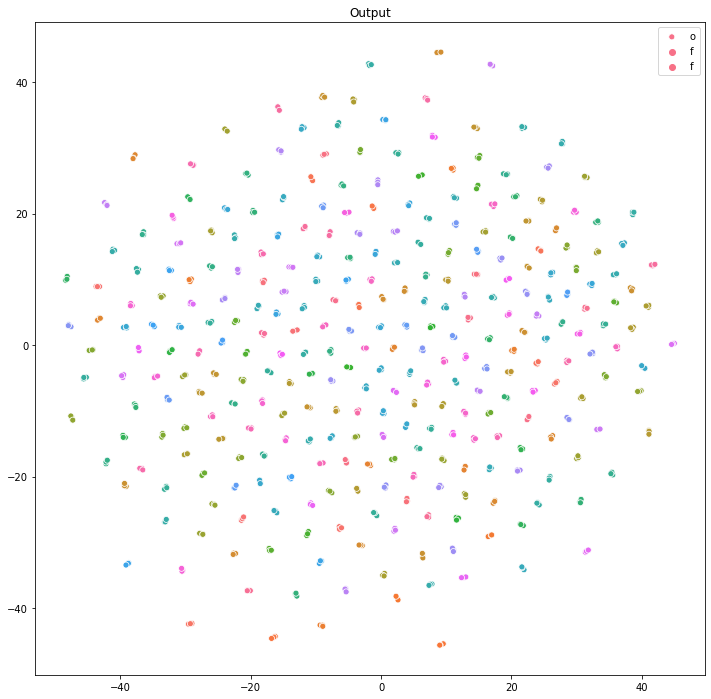

In [45]:
fig = plt.figure(figsize=(12,12))
sns.scatterplot(enc[:,0],enc[:,1],hue=dataset.y)

plt.legend("off")
plt.title("Output")